In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('white')
sns.set_context("paper")

# VC Pay correlation

Quick analysis looking at whether VC pay correlates at all with causalisation, teaching or research performance of a university.

First let's get the UCU data and get it into a nice dataframe:

In [64]:
#!curl "https://www.ucu.org.uk/media/7997/Precarious-work-in-higher-education-the-data-tables-Apr-16/spreadsheet/ucu_hecontract_lookup_rankingtables.xlsx" > ucu_hecontract_lookup_rankingtables.xlsx

In [65]:
#parse ucu data and join percentages

ucu_all_academics = pd.read_excel("ucu_hecontract_lookup_rankingtables.xlsx", 
                                  sheetname=1)[["HEI", 
                                                '% of staff insecure (fixed-term + atypical)']].set_index("HEI")

ucu_all_academics_ZH = pd.read_excel("ucu_hecontract_lookup_rankingtables.xlsx", 
                                     sheetname=2)[["All Academics + ZH HEI", 
                                                   "All Academics + ZH ranked % of staff insecure (fixed-term + zero hours)"]].set_index("All Academics + ZH HEI")

ucu_all_TO_TR = pd.read_excel("ucu_hecontract_lookup_rankingtables.xlsx", 
                              sheetname=3)[["All TO & TR HEI", 
                                            "All TO & TR % of staff insecure (fixed-term + atypical)"]].set_index("All TO & TR HEI")

ucu_all_TO_ZH = pd.read_excel("ucu_hecontract_lookup_rankingtables.xlsx", 
                              sheetname=4)[["All TO & ZH teach HEI",
                                            'All TO & ZH teach % of staff insecure (fixed-term + zero hours)']].set_index("All TO & ZH teach HEI")

# Join on institution names
ucu_all = ucu_all_academics.join([ucu_all_academics_ZH, ucu_all_TO_TR, ucu_all_TO_ZH])

# Replace not reported values with NaNs for consistency
ucu_all = ucu_all.replace("Not reported by HEI", "NaN")

/home/fin/miniconda3/envs/AMRtime_analysis/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Now we need to get the VC Pay data, I found a THE listing from the same year as these statistics."

In [66]:
#!curl https://www.timeshighereducation.com/sites/default/files/breaking_news_files/v-c_pay_survey_2018.pdf
#convert with tabula to a useable format

vc_pay_columns = ["University", "Vice-chancellor/chief executive", 
"Basic salary 2016-17 (£)", "Bonuses/performance-related pay", 
"Benefits 2016-17 (£)", "Allowance in lieu of pension contributions",
"Total excluding pension 2016-17 (£)", "% change in total salary since 2015-16", 
"Pension 2016-17 (£)", "% change including pension since 2015-16", "Total including pension 2016-17 (£)"]
vc_pay = pd.read_csv('tabula-v-c_pay_survey_2018.csv', names=vc_pay_columns)
vc_pay = vc_pay.drop(0)
vc_pay = vc_pay[['University', 'Vice-chancellor/chief executive', 'Total including pension 2016-17 (£)']]
vc_pay['University'] = vc_pay['University'].fillna(method='ffill')

# get total per university with multiple VCs
vc_pay = vc_pay.groupby('University').tail(1)

In [69]:
set(vc_pay['University']).difference(set(ucu_all.index))

{'Abertay University',
 'Arts University Bournemouth',
 'Birkbeck, University of London',
 'Bucks New University',
 'City, University of London',
 'Durham University',
 'Goldsmiths, University of London',
 'Imperial College London',
 'Institute of Cancer Research',
 'Keele University',
 'King’s College London',
 'Lancaster University',
 'Leeds Arts University',
 'Liverpool Institute for Performing Arts',
 'Manchester Metropolitan University',
 'Newcastle University',
 'Northumbria University',
 'Nottingham Trent University',
 'Plymouth Marjon University',
 'Plymouth University',
 'Queen Margaret University',
 'Queen’s University Belfast',
 'Regent’s University London',
 'Robert Gordon University',
 'Royal Central School of Speech and Drama',
 'Royal Holloway, University of London',
 'Royal Veterinary College',
 'SRUC (Scotland’s Rural College)*',
 'Soas, University of London',
 'St George’s, University of London',
 'St Mary’s University, Twickenham',
 'UCL',
 'University of Aberdeen',


In [50]:
#for name in vc_pay['University'].values:
#    print(name.replace('University of', '').replace("University", "").strip())

In [ ]:
Aberdeen
Abertay
Aberystwyth
Anglia Ruskin
Arts Bournemouth
Aston
Bangor
Bath
Bath Spa
Bedfordshire
Birkbeck,  London
Birmingham
Birmingham City
Bishop Grosseteste
Bournemouth
Bradford
Brighton
Bristol
Brunel  London
Buckingham
Bucks New
Cambridge
Canterbury Christ Church
Cardiff
Cardiff Metropolitan
Central Lancashire
Chester
Chichester
City,  London
Courtauld Institute of Art
Coventry
Cranfield
Cumbria
De Montfort
Derby
Dundee
Durham
East Anglia
East London
Edge Hill
Edinburgh
Edinburgh Napier
Essex
Exeter
Falmouth
Glasgow
Glasgow Caledonian
Glasgow School of Art
Gloucestershire
Goldsmiths,  London
Greenwich
Guildhall School of Music and Drama
Harper Adams
Heriot-Watt
Hertfordshire
the Highlands and Islands
Huddersfield
Hull
Imperial College London
Institute of Cancer Research
Keele
Kent
King’s College London
Kingston
Lancaster
Leeds
Leeds Arts
Leeds Beckett
Leeds Trinity
Leicester
Lincoln
Liverpool
Liverpool Hope
Liverpool Institute for Performing Arts
Liverpool John Moores
Liverpool School of Tropical Medicine
London
London Business School
London Metropolitan
London School of Economics and Political Science
London School of Hygiene and Tropical Medicine
London South Bank
Loughborough
Manchester
Manchester Metropolitan
Middlesex
Newcastle
Newman
Northampton
Northumbria
Norwich  the Arts
Nottingham
Nottingham Trent
The Open
Oxford
Oxford Brookes
Plymouth Marjon
Plymouth
Portsmouth
Queen Margaret
Queen Mary  London
Queen’s  Belfast
Ravensbourne
Reading
Regent’s  London
Robert Gordon
Roehampton
Rose Bruford College
Royal Academy of Music
Royal Agricultural
Royal Central School of Speech and Drama
Royal College of Art
Royal College of Music
Royal Conservatoire of Scotland
Royal Holloway,  London
Royal Northern College of Music
Royal Veterinary College
St Andrews
St George's,  London
St Mary's , Twickenham
Salford
Sheffield
Sheffield Hallam
SOAS
South Wales
Southampton
Southampton Solent
SRUC
Staffordshire
Stirling
Strathclyde
Suffolk
Sunderland
Surrey
Sussex
Swansea
Teesside
Trinity Laban Conservatoire of Music and Dance
UCL
Ulster
University of the Arts London
College Birmingham
University for the Creative Arts
Wales Trinity St David
Warwick
West London
the West of Scotland
the West of England
Westminster
Winchester
Wolverhampton
Worcester
Wrexham Glyndwr
Writtle College
York
York St John

In [59]:
sorted(ucu_all.index)

['Aberdeen',
 'Abertay Dundee',
 'Aberystwyth',
 'Anglia Ruskin',
 'Aston',
 'Bangor',
 'Bath',
 'Bath Spa',
 'Bedfordshire',
 'Birkbeck',
 'Birmingham',
 'Birmingham',
 'Birmingham City',
 'Bishop Grosseteste',
 'Bolton',
 'Bournemouth',
 'Bournemouth',
 'Bradford',
 'Brighton',
 'Bristol',
 'Brunel',
 'Buckingham',
 'Bucks New University',
 'Cambridge',
 'Canterbury Christ Church',
 'Cardiff',
 'Cardiff Met',
 'Central Lancashire',
 'Central School of Speech and Drama',
 'Chichester',
 'City',
 'Conservatoire for Dance and Drama',
 'Courtauld Institute of Art',
 'Coventry',
 'Cranfield',
 'Cumbria',
 'De Montfort',
 'Derby',
 'Dundee',
 'Durham',
 'East London',
 'Edge Hill',
 'Edinburgh',
 'Edinburgh Napier',
 'Essex',
 'Exeter',
 'Falmouth',
 'Glasgow',
 'Glasgow Caledonian',
 'Glasgow School of Art',
 'Gloucestershire',
 'Glyndŵr University',
 'Goldsmiths',
 'Greenwich',
 'Guildhall School of Music and Drama',
 'Harper Adams',
 'Heriot-Watt',
 'Hertfordshire',
 'Heythrop College',

Now we need to get UK university rankings for both teaching and research.  I've chosen the Guardian guide for teaching stats because they nicely place it as a downloadable spreadsheet.  Similarly for world rankings (which tend to favour teaching) I've used the QS stats as it was easiest to scrape.

In [4]:
#curl "https://docs.google.com/spreadsheets/d/1qy-n4Hftekk3weuwRwBe8zcLgpBOPzABDugrjiXIysQ/export?gid=1492221413&format=xlsx" > guardian_ranking.xlsx

In [56]:
guardian_rankings = pd.read_excel("guardian_ranking.xlsx", 
                                  sheetname=0)[['Institution',
                                                'Average Teaching Score',
                                                'NSS Teaching (%)', 
                                                'NSS Overall (%)', 
                                                'Entry Tariff']][:-1]
guardian_rankings['Guardian 2017 Overall Ranking'] = [x+1 for x in guardian_rankings.index]
guardian_rankings = guardian_rankings.set_index('Institution')
guardian_rankings = guardian_rankings.rename(columns={'Average Teaching Score': 'Guardian 2017 Average Teaching Score'})

# just grabbed directly from http://www.topuniversities.com/university-rankings/world-university-rankings/2015#sorting=rank+region=+country=208+faculty=+stars=false+search=
# Where it was a range rankings e.g. 701+ or 501-550 I've taken just the start of the range.
# Those with world rankings are given a ranking of 1000
qs_world_rankings = pd.read_csv("qs_world_rankings.csv").set_index("Institution")

rankings = guardian_rankings.join(qs_world_rankings)
rankings["QS 2016 World Rank"] = rankings["QS 2016 World Rank"].fillna(1000).astype(int)

/home/fin/miniconda3/envs/AMRtime_analysis/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Unfortunately, the guardian uses stripped down names for some reason, easier to strip down names of "University of etc"  Quicker to manually fix

In [57]:
ucu_all.index = ['Royal College of Art',
 'Open',
 'Central School of Speech and Drama',
 'University of London (Institutes and activities)',
 'LSHTM',
 'Oxford',
 'Queen Mary',
 'Buckingham',
 'Manchester',
 'Edge Hill',
 'Warwick',
 'Anglia Ruskin',
 'Courtauld Institute of Art',
 'East London',
 'University',
 "St George's Hospital Medical School",
 'Birmingham',
 'Bradford',
 'Queen Margaret',
 'Edinburgh',
 'Exeter',
 "Queen's, Belfast",
 'Bangor',
 'St Mark and St John',
 'University of the Arts London',
 'Ravensbourne',
 'University for the Creative Arts',
 'Southampton',
 'Bishop Grosseteste',
 'Keele',
 'Sunderland',
 'Staffordshire',
 'Coventry',
 'Dundee',
 'Aston',
 'Kingston',
 'York',
 'Gloucestershire',
 'Strathclyde',
 'Middlesex',
 'SOAS',
 'Goldsmiths',
 'Leicester',
 "St Mary's, Twickenham",
 'Stirling',
 'Leeds Beckett',
 'Liverpool',
 'Loughborough',
 'Lancaster',
 'Teesside',
 'West London',
 'Nottingham',
 'Swansea',
 'Bristol',
 'Glasgow Caledonian',
 'Durham',
 'UEA',
 'Imperial College',
 'Bath',
 'Canterbury Christ Church',
 'Plymouth',
 'Brunel',
 'Hull',
 'Ulster',
 'Sheffield',
 'Abertay Dundee',
 'Essex',
 'Leeds',
 'Newcastle',
 'Kent',
 'Cardiff',
 'Oxford Brookes',
 'LSE',
 'Bedfordshire',
 'London Met',
 'Surrey',
 'Reading',
 'Greenwich',
 'UWE',
 'Birkbeck',
 'St Andrews',
 'Liverpool Institute for Performing Arts',
 'Liverpool Hope',
 'Glyndŵr University',
 'Birmingham City',
 'Glasgow',
 'De Montfort',
 'Aberystwyth',
 'Leeds Trinity',
 'Cranfield',
 'Royal Veterinary College',
 'Newman',
 'University Campus Suffolk',
 'Cumbria',
 'Lincoln',
 'Sussex',
 'University of the Highlands and Islands',
 'Bournemouth',
 'Falmouth',
 'Westminster',
 'Institute of Education',
 'South Wales',
 'Conservatoire for Dance and Drama',
 'Royal Academy of Music',
 'Huddersfield',
 'Cambridge',
 'Birmingham',
 'Heriot-Watt',
 'Wolverhampton',
 'Northampton',
 'York St John',
 'Roehampton',
 'Writtle College',
 'Northumbria',
 'Bolton',
 'Robert Gordon',
 'Leeds College of Art',
 'West of Scotland',
 'Derby',
 'UCL',
 'Hertfordshire',
 'Stranmillis',
 'University of Wales Trinity Saint David',
 'The University of Wales (central functions)',
 'Glasgow School of Art',
 'SRUC',
 'Aberdeen',
 'Norwich University of the Arts',
 'Royal Agricultural University',
 'Edinburgh Napier',
 'Royal Conservatoire of Scotland',
 'Harper Adams',
 'Royal College of Music',
 'Salford',
 'Bath Spa',
 'Bournemouth',
 'Brighton',
 'Bucks New University',
 'Institute of Cancer Research',
 'Cardiff Met',
 'Central Lancashire',
 'Chichester',
 'City',
 'Guildhall School of Music and Drama',
 'Heythrop College',
 "King's College London",
 'Liverpool John Moores',
 'Liverpool School of Tropical Medicine',
 'London Business School',
 'South Bank',
 'Manchester Met',
 'Nottingham Trent',
 'Portsmouth',
 'Rose Bruford College',
 'Royal Holloway',
 'Royal Northern College of Music',
 "St Mary's University College",
 'Sheffield Hallam',
 'Southampton Solent',
 'Trinity Laban Conservatoire of Music and Dance',
 'Winchester',
 'Worcester',
 'UK Total ']

In [58]:
data = ucu_all.join(rankings)
# let's also drop those without UCU data or a guardian ranking
data = data[data['% of staff insecure (fixed-term + atypical)'].notnull()]
data = data[data['Guardian 2017 Overall Ranking'].notnull()]
data.shape

(98, 11)

GOOD ENOUGH

ONWARDS TO ANALYSIS

## Regression

In [213]:
#data.iloc[:,[0,1,2,3,4,7,8,9]]
data.columns

Index(['% of staff insecure (fixed-term + atypical)',
       'All Academics + ZH ranked % of staff insecure (fixed-term + zero hours)',
       'All TO & TR % of staff insecure (fixed-term + atypical)',
       'All TO & ZH teach % of staff insecure (fixed-term + zero hours)',
       'Guardian 2017 Average Teaching Score', 'NSS Teaching (%)',
       'NSS Overall (%)', 'Entry Tariff', 'Guardian 2017 Overall Ranking',
       'QS 2016 World Rank', ' QS 2016 Score'],
      dtype='object')

/usr/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


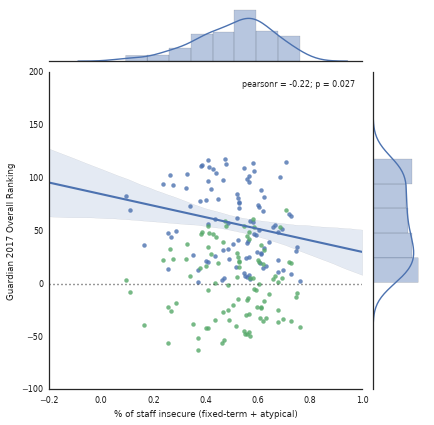

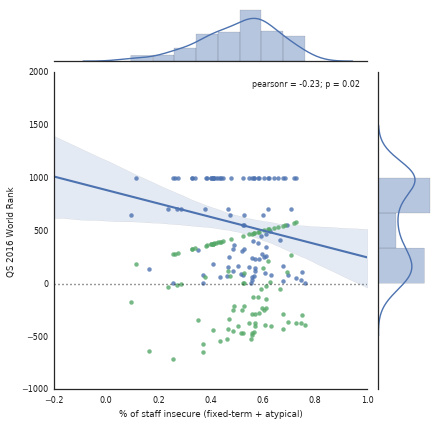

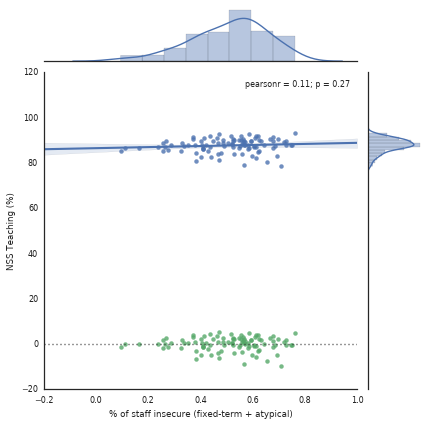

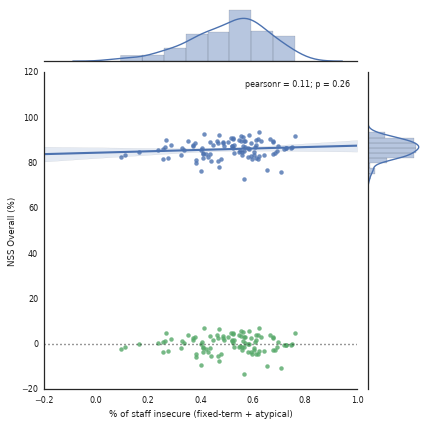

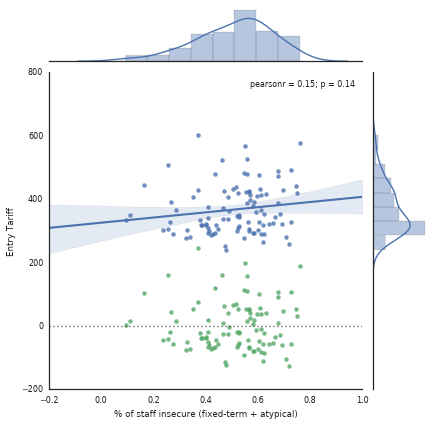

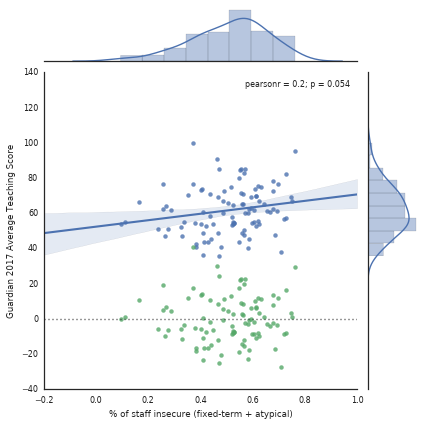

In [246]:
sns.jointplot('% of staff insecure (fixed-term + atypical)', 'Guardian 2017 Overall Ranking', data=data, kind="reg")
sns.residplot('% of staff insecure (fixed-term + atypical)', 'Guardian 2017 Overall Ranking', data=data)
sns.jointplot('% of staff insecure (fixed-term + atypical)', 'QS 2016 World Rank', data=data, kind="reg")
sns.residplot('% of staff insecure (fixed-term + atypical)', 'QS 2016 World Rank', data=data)
sns.jointplot('% of staff insecure (fixed-term + atypical)', 'NSS Teaching (%)', data=data, kind="reg")
sns.residplot('% of staff insecure (fixed-term + atypical)', 'NSS Teaching (%)', data=data)
sns.jointplot('% of staff insecure (fixed-term + atypical)', 'NSS Overall (%)', data=data, kind="reg")
sns.residplot('% of staff insecure (fixed-term + atypical)', 'NSS Overall (%)', data=data)
sns.jointplot('% of staff insecure (fixed-term + atypical)', 'Entry Tariff', data=data, kind="reg")
sns.residplot('% of staff insecure (fixed-term + atypical)', 'Entry Tariff', data=data)
sns.jointplot('% of staff insecure (fixed-term + atypical)', 'Guardian 2017 Average Teaching Score', data=data, kind="reg")
sns.residplot('% of staff insecure (fixed-term + atypical)', 'Guardian 2017 Average Teaching Score', data=data)

/usr/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


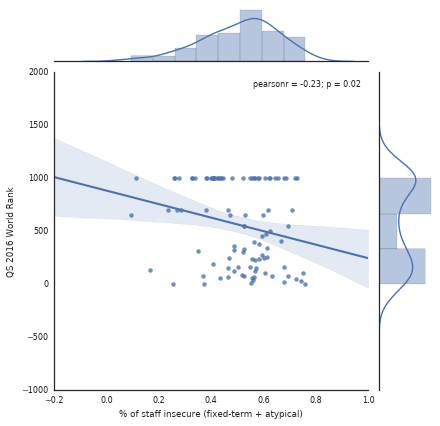

In [221]:
sns.jointplot('% of staff insecure (fixed-term + atypical)','QS 2016 World Rank', data=data, kind="reg")

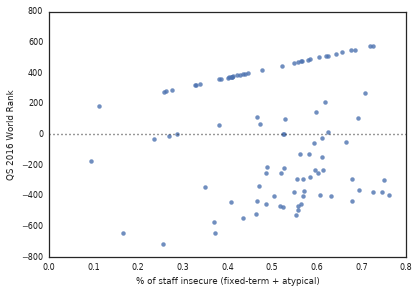

In [218]:
sns.residplot('% of staff insecure (fixed-term + atypical)','QS 2016 World Rank', data=data)

## BAYES FOR DAYS

In [226]:
data.columns

Index(['% of staff insecure (fixed-term + atypical)',
       'All Academics + ZH ranked % of staff insecure (fixed-term + zero hours)',
       'All TO & TR % of staff insecure (fixed-term + atypical)',
       'All TO & ZH teach % of staff insecure (fixed-term + zero hours)',
       'Guardian 2017 Average Teaching Score', 'NSS Teaching (%)',
       'NSS Overall (%)', 'Entry Tariff', 'Guardian 2017 Overall Ranking',
       'QS 2016 World Rank', ' QS 2016 Score'],
      dtype='object')

In [243]:
# module import
import pystan
import numpy as np
import pylab as py
import pandas as pd
 
## data simulation
x = list(data['% of staff insecure (fixed-term + atypical)'])
y = list(data['Entry Tariff'])

def bayesian_linear_regression(X,y):
    N = len(x)
    
    plt.plot(x,y, 'o')
    plt.show()
 
    # STAN model (this is the most important part)
    regress_code = """
    data {
     int<lower = 0> N; // number of observations
     real y[N]; // response variable
     real x[N]; // predictor variable
    }
    parameters {
     real a; // intercept
     real b; // slope
     real<lower=0> sigma; // standard deviation
    }
    transformed parameters {
     real mu[N]; // fitted values
 
    for(i in 1:N)
     mu[i] <- a + b*x[i];
    }
    model {
     y ~ normal(mu, sigma);
    }
    """
 
    # make a dictionary containing all data to be passed to STAN
    regress_dat = {'x': x,
     'y': y,
     'N': N}
 
    # Fit the model
    fit = pystan.stan(model_code=regress_code, data=regress_dat,
                     iter=1000, chains=4)
    
    return fit

def bayesian_fit_analysis(fit):
    # model summary
    print(fit)
 
    # show a traceplot of ALL parameters. This is a bear if you have many
    fit.traceplot()
    plt.show()
 
    # Instead, show a traceplot for single parameter
    fit.plot(['a'])
    plt.show()
 
    ##### PREDICTION ####
 
    # make a dataframe of parameter estimates for all chains
    params = pd.DataFrame({'a': fit.extract('a', permuted=True)['a'], 'b': fit.extract('b', permuted=True)['b']})
 
    # next, make a prediction function. Making a function makes every step following this 10 times easier
    def stanPred(p):
        fitted = p[0] + p[1] * predX
        return pd.Series({'fitted': fitted})
 
    # make a prediction vector (the values of X for which you want to predict)
    predX = np.arange(1, 100)
 
    # get the median parameter estimates
    medParam = params.median()
    # predict
    yhat = stanPred(medParam)
 
    # get the predicted values for each chain. This is super convenient in pandas because
    # it is possible to have a single column where each element is a list
    chainPreds = params.apply(stanPred, axis = 1)
 
    ## PLOTTING
 
    # create a random index for chain sampling
    idx = np.random.choice(1999, 50)
    # plot each chain. chainPreds.iloc[i, 0] gets predicted values from the ith set of parameter estimates
    for i in range(len(idx)):
        plt.plot(predX, chainPreds.iloc[idx[i], 0], color='lightgrey')
 
    # original data
    plt.plot(x, y, 'ko')
    # fitted values
    plt.plot(predX, yhat['fitted'], 'k')
 
    # supplementals
    plt.xlabel('X')
    plt.ylabel('Y')
 
    plt.show()
    
     
def quantileGet(q):
    # make a list to store the quantiles
    quants = []
 
    # for every predicted value
    for i in range(len(predX)):
        # make a vector to store the predictions from each chain
        val = []
 
        # next go down the rows and store the values
        for j in range(chainPreds.shape[0]):
            val.append(chainPreds['fitted'][j][i])
 
        # return the quantile for the predictions.
        quants.append(np.percentile(val, q))
 
    return quants
 
def quant_plot(quants, predx, xlabel, ylabel):
    # NOTE THAT NUMPY DOES PERCENTILES, SO MULTIPLE QUANTILE BY 100
    # 2.5% quantile
    lower = quantileGet(2.5)
    #97.5
    upper = quantileGet(97.5)
 
    # plot this
    fig = plt.figure()
    ax = fig.add_subplot(111)
 
    # shade the credible interval
    ax.fill_between(predX, lower, upper, facecolor = 'lightgrey', edgecolor = 'none')
    # plot the data
    ax.plot(x, y, 'ko')
    # plot the fitted line
    ax.plot(predX, yhat['fitted'], 'k')
 
    # supplementals
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()
 
    plt.show()

In [ ]:
bayesian_fit_analysis(bayesian_linear_regression())